In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

### Load data

In the data dive folder the prepared data is grouped by district name.  In order to load data from folder, start typing folder name in quotes like **"Nagornyj/"** and after that press Tab button to see files stored in a folder. 
First, load the following:

#### Load district boundary

In [2]:
district = gpd.read_file('Izmajlovo/Izmajlovo_district.geojson')

In [3]:
district.head()

,Area,District,TotalMen,TotalMen18to27,TotalMen18to60,TotalMenOlder60,TotalPopulation,TotalPopulationOfRetirementAge,TotalPopulationUnder18,TotalPopulationWorkingAge,TotalWomen,TotalWomen18to55,TotalWomenOlder55,buildings_count,geometry,id
0,Vostochnyj administrativnyj okrug,Izmajlovo,40383,3621,21284,12753,97707,43620,12226,41861,57324,20577,30867,220,"POLYGON ((37.7999426 55.7881288, 37.7999256 55...",117


In [4]:
population = pd.DataFrame(columns=['TotalPopulationOfRetirementAge','TotalPopulationUnder18','TotalPopulationWorkingAge'])

population.plot.bar

<bound method FramePlotMethods.bar of <pandas.tools.plotting.FramePlotMethods object at 0x0C986B10>>

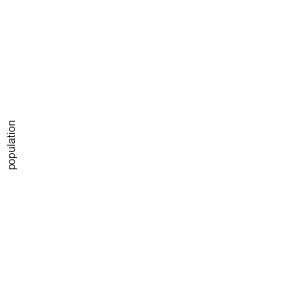

In [36]:
population = pd.Series(index=['TotalPopulationOfRetirementAge','TotalPopulationUnder18','TotalPopulationWorkingAge'], name='population')

population.plot.pie(figsize=(5, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0A5EA5D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0D968170>], dtype=object)

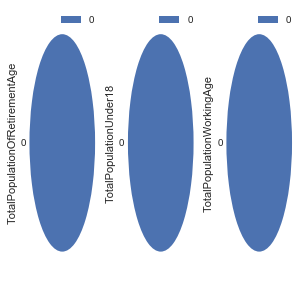

In [38]:
district[['TotalPopulationOfRetirementAge','TotalPopulationUnder18','TotalPopulationWorkingAge']].plot.pie(figsize=(5, 5),subplots=True)

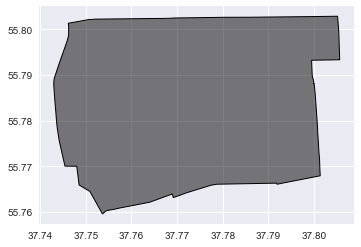

In [6]:
district.plot()

#### Load google places

In [7]:
google_places = gpd.read_file('Izmajlovo/Izmajlovo_google_places.geojson')

In [8]:
google_places.head()

,geometry,id,lat,lon,name,newtype,type
0,POINT (37.804798 55.80232),ChIJwfn5hsk0tUYR24ZKkEG5MGY,55.802320,37.804798,Сопутствующие Товары,Retail,store
1,POINT (37.8048273 55.80204229999999),ChIJCW-RgMk0tUYRZe8S3DHJcSc,55.802042,37.804827,Detskoye Pitaniye,Retail,clothing_store
2,POINT (37.804743 55.802053),ChIJpeuXgMk0tUYRG0IwXle0ST0,55.802053,37.804743,Magazin detskogo pitaniya,Outdoor spaces,point_of_interest
3,POINT (37.773935 55.78351249999999),ChIJlRhZQCw1tUYRgH--nYrZfpg,55.783513,37.773935,Izmaylovo District,Outdoor spaces,sublocality_level_2
4,POINT (37.804834 55.800255),ChIJ-weVkss0tUYRXr7IUtX9HEU,55.800255,37.804834,Parikmakherskaya,Health & beauty,beauty_salon


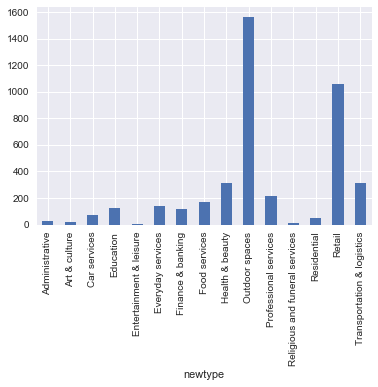

In [9]:
google_places.groupby('newtype', sort=True).size().plot(kind='bar')

In [10]:
google_places.newtype.value_counts()

Outdoor spaces                    1559
Retail                            1055
Health & beauty                    310
Transportation & logistics         309
Professional services              213
Food services                      171
Everyday services                  143
Education                          121
Finance & banking                  120
Car services                        69
Residential                         48
Administrative                      29
Art & culture                       22
Religious and funeral services      10
Entertainment & leisure              5
Name: newtype, dtype: int64

In [11]:
google_places.head()

,geometry,id,lat,lon,name,newtype,type
0,POINT (37.804798 55.80232),ChIJwfn5hsk0tUYR24ZKkEG5MGY,55.802320,37.804798,Сопутствующие Товары,Retail,store
1,POINT (37.8048273 55.80204229999999),ChIJCW-RgMk0tUYRZe8S3DHJcSc,55.802042,37.804827,Detskoye Pitaniye,Retail,clothing_store
2,POINT (37.804743 55.802053),ChIJpeuXgMk0tUYRG0IwXle0ST0,55.802053,37.804743,Magazin detskogo pitaniya,Outdoor spaces,point_of_interest
3,POINT (37.773935 55.78351249999999),ChIJlRhZQCw1tUYRgH--nYrZfpg,55.783513,37.773935,Izmaylovo District,Outdoor spaces,sublocality_level_2
4,POINT (37.804834 55.800255),ChIJ-weVkss0tUYRXr7IUtX9HEU,55.800255,37.804834,Parikmakherskaya,Health & beauty,beauty_salon


#### Load khrushchevki

In [12]:
houses = gpd.read_file('Izmajlovo/Izmajlovo_chruchevki.geogson')

In [13]:
houses.head()

,area,area_land,area_live,area_nonlive,area_parking,critical_conditions,geometry,house_id,house_type,id,...,playground,room_nonresidential_count,room_residential_count,room_total_count,service_day,service_last_date,service_month,service_year,sportground,year
0,4049.0,4463.0,2790.0,1259.0,1250.0,0.0,POINT (37.779943 55.789406),7560395,apartment house,8753,...,0.0,1.0,1.0,42.0,1.0,01.01.2007,1.0,2007.0,0.0,1960.0
1,1810.0,3175.0,997.5,258.0,0.0,0.0,POINT (37.783383 55.789871),7560413,apartment house,8755,...,0.0,1.0,1.0,40.0,1.0,01.01.2007,1.0,2007.0,0.0,1962.0
2,7081.0,3560.0,6470.0,611.0,650.0,0.0,POINT (37.786285 55.789654),7575058,apartment house,8756,...,0.0,2.0,152.0,152.0,1.0,01.04.2010,4.0,2010.0,0.0,1965.0
3,4238.0,0.0,2788.7,1449.3,0.0,0.0,POINT (37.776017 55.792731),7554753,apartment house,8757,...,1.0,0.0,65.0,65.0,1.0,01.05.2008,5.0,2008.0,1.0,1964.0
4,1911.0,0.0,1575.9,335.1,0.0,0.0,POINT (37.774733 55.792346),7554758,apartment house,8758,...,0.0,0.0,40.0,40.0,1.0,01.05.2008,5.0,2008.0,0.0,1962.0


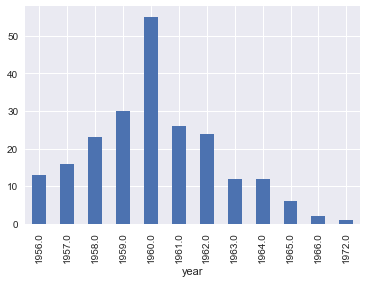

In [14]:
houses.groupby('year', sort=True).size().plot(kind='bar')

In [15]:
houses.shape

(220, 22)

In [16]:
demolition = gpd.read_file('Izmajlovo/demolition.shp')

In [17]:
demolition = demolition.dropna()

In [18]:
demolition.head()

,address,cartodb_id,geometry,latitude,longitude
1,"Москва, 2-я Прядильная улица, дом 3, корпус 2",3,POINT (37.77696 55.796132),55.796132,37.776960
2,"Москва, 2-я Прядильная улица, дом 7А",4,POINT (37.778937 55.796481),55.796481,37.778937
3,"Москва, 2-я Прядильная улица, дом 9",5,POINT (37.780715 55.796304),55.796304,37.780715
4,"Москва, 3-я Парковая улица, дом 37",6,POINT (37.781614 55.797751),55.797751,37.781614
5,"Москва, 3-я Парковая улица, дом 39, корпус 2",7,POINT (37.781129 55.798166),55.798166,37.781129


In [19]:
sale = gpd.read_file('Izmajlovo/sale.shp')

In [20]:
sale = sale.dropna()

In [21]:
sale.head()

,address,area,cartodb_id,geometry,latitude,longitude,price,price_per_,room
0,"Москва, 3-я Парковая улица, 6",56.0,172,POINT (37.784641 55.789633),55.789633,37.784641,6200000,110714.285714,2
1,"Москва, Первомайская улица, 14",31.0,1,POINT (37.775406 55.791197),55.791197,37.775406,5800000,187096.774194,1
2,"Москва, Первомайская улица, 73",31.0,2,POINT (37.797882 55.793439),55.793439,37.797882,5000000,161290.322581,1
3,"Москва, 7-я Парковая улица, 2К1",30.0,3,POINT (37.794666 55.788996),55.788996,37.794666,4990000,166333.333333,1
4,"Москва, Измайловский проспект, 77К2",30.0,4,POINT (37.79596 55.789051),55.789051,37.795960,5000000,166666.666667,1


In [22]:
rent = gpd.read_file('Izmajlovo/rent.shp')

In [23]:
rent = rent.dropna()

In [24]:
rent.head()

,address,area,cartodb_id,geometry,latitude,longitude,price,price_per_,room
0,"Москва, Измайловский проезд, 20К2",40.0,1,POINT (37.770394 55.79938),55.799380,37.770394,25000.0,625.000000,1.0
1,"Москва, Измайловский проезд, 26",37.0,2,POINT (37.771373 55.800964),55.800964,37.771373,30000.0,810.810811,1.0
2,"Москва, 3-я Парковая улица, 34",35.0,3,POINT (37.782791 55.79978),55.799780,37.782791,25000.0,714.285714,1.0
3,"Москва, 5-я Парковая улица, 8",37.0,4,POINT (37.789187 55.789664),55.789664,37.789187,26000.0,702.702703,1.0
4,"Москва, 3-я Прядильная улица, 1",32.0,5,POINT (37.770232 55.798753),55.798753,37.770232,27000.0,843.750000,1.0


In [25]:
rent.crs

{'init': 'epsg:4326'}

In [67]:
type(rent)

geopandas.geodataframe.GeoDataFrame

In [66]:
rent.to_crs(epsg=4326, inplace=True)

RuntimeError: b'no arguments in initialization list'

#### Group google places by column **newtype** and draw the barplot. What are the most frequent venues?

Great. Now you know something about google places but we are interested in spatial distribution of these places across a given district. 

### Plot Maps

Before plotting the objects on the map, we need to define the base layer. Folium requires the initial point to create the map. The initial point will be the center of your district. Extract the centroid of your polygon and fill the coordinates below:

In [26]:
center_lat = list(district.centroid[0].coords)[0][1]
center_lon = list(district.centroid[0].coords)[0][0]

In [27]:
district.centroid[0].coords

#### Plot the base layer

In [28]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)
map_places

#### Add to the map khrushchevki locations and district boundary

In [29]:
map_places = folium.Map([center_lat, center_lon], tiles='OpenStreetMap', zoom_start=14,control_scale=True)

style_function = lambda feature: dict(fillColor='#AECCAE',
                                      color='#AECCAE',
                                      weight=1,
                                      opacity=0.3)

points = folium.features.GeoJson(houses,name='Khurshevki houses')
polygon = folium.features.GeoJson(district, style_function=style_function,name='district boundary')
points = folium.features.GeoJson(demolition,name='demolition')
points = folium.features.GeoJson(sale,name='sale')
points = folium.features.GeoJson(rent,name='rent')

map_places.add_child(points,name='Khurshevki houses')
map_places.add_child(polygon,name='district boundary')
map_places.add_child(points,name='demolition')
map_places.add_child(points,name='sale')
map_places.add_child(points,name='rent')

folium.LayerControl().add_to(map_places)
map_places

In [46]:
map_places = folium.Map([center_lat, center_lon], tiles='OpenStreetMap', zoom_start=14,control_scale=True)
style_function = lambda feature: dict(fillColor='#AECCAE',
                                      color='#AECCAE',
                                      weight=1,
                                      opacity=0.3)

points = folium.features.GeoJson(houses,name='Khurshevki houses')
polygon = folium.features.GeoJson(district, style_function=style_function,name='district boundary')

map_places.add_child(points,name='Khurshevki houses')
map_places.add_child(polygon,name='district boundary')

folium.LayerControl().add_to(map_places)
map_places

As you know your popular venue categories, you can plot the as a heatmap. Choose the venue categories and write them to the list

In [30]:
transport = google_places[google_places['newtype'] == 'Transportation & logistics']
retail = google_places[google_places['newtype'] == 'Retail']
health_beauty = google_places[google_places['newtype'] == 'Health & beauty']
outdoor_spaces = google_places[google_places['newtype'] == 'Outdoor spaces']
food = google_places[google_places['newtype'] == 'Food services']
professional_services = google_places[google_places['newtype'] == 'Professional services']
everyday_services = google_places[google_places['newtype'] == 'Everyday services']
culture  = google_places[google_places['newtype'] == 'Art & culture']
education = google_places[google_places['newtype'] == 'Education']

transport_coords = list(zip(transport.lat, transport.lon))
retail_coords = list(zip(retail.lat, retail.lon))
health_beauty_coords = list(zip(health_beauty.lat, health_beauty.lon))
outdoor_spaces_coords = list(zip(outdoor_spaces.lat, outdoor_spaces.lon))
food_coords = list(zip(food.lat, food.lon))
professional_services = list(zip(professional_services.lat, professional_services.lon))
everyday_services = list(zip(everyday_services.lat, everyday_services.lon))
culture = list(zip(culture.lat, culture.lon))
education = list(zip(education.lat, education.lon))

In [72]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)

colormap = {.0: 'blue', .2: 'cyan', .4: 'green', .6: 'yellow', .8:'orange', 1.:'red'}

HeatMap(transport_coords,
        name='transport',
        radius=10, 
        min_opacity=0.8,
       gradient={.0: 'blue', .2: 'cyan', .4: 'green', .6: 'yellow', .8:'orange', 1.:'red'}).add_to(map_places)

HeatMap(retail_coords,
        name='retail',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'blue', .2: 'cyan', .4: 'green', .6: 'yellow', .8:'orange', 1.:'red'}).add_to(map_places)

HeatMap(health_beauty_coords,
        name='health & beauty',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'blue', .2: 'cyan', .4: 'green', .6: 'yellow', .8:'orange', 1.:'red'}).add_to(map_places)

HeatMap(outdoor_spaces_coords,
        name='outdoor spaces',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'blue', .2: 'cyan', .4: 'green', .6: 'yellow', .8:'orange', 1.:'red'}).add_to(map_places)

HeatMap(food_coords,
        name='food services',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'blue', .2: 'cyan', .4: 'green', .6: 'yellow', .8:'orange', 1.:'red'}).add_to(map_places)

HeatMap(professional_services,
        name='professional services',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'blue', .2: 'cyan', .4: 'green', .6: 'yellow', .8:'orange', 1.:'red'}).add_to(map_places)

HeatMap(everyday_services,
        name='everyday servicess',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'blue', .2: 'cyan', .4: 'green', .6: 'yellow', .8:'orange', 1.:'red'}).add_to(map_places)

HeatMap(culture,
        name='culture',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'blue', .2: 'cyan', .4: 'green', .6: 'yellow', .8:'orange', 1.:'red'}).add_to(map_places)

HeatMap(education,
        name='education',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'blue', .2: 'cyan', .4: 'green', .6: 'yellow', .8:'orange', 1.:'red'}).add_to(map_places)


colormap = folium.LinearColormap(colors = colormap.values())
colormap.caption = 'Density of places'
map_places.add_child(colormap)

folium.LayerControl().add_to(map_places)
map_places

In [48]:
rentcost = rent['price_per_']

rentcost_coords = list(zip(rent.latitude, rent.longitude))


salecost = sale['price_per_']

salecost_coords = list(zip(sale.latitude, sale.longitude))

In [41]:
rentcost

0      625.000000
1      810.810811
2      714.285714
3      702.702703
4      843.750000
5      848.484848
6      666.666667
7      779.944290
8      800.000000
9      750.000000
10     750.000000
11     857.142857
12     909.090909
13     750.000000
14     625.000000
15     970.588235
19     614.035088
20     622.222222
21     888.888889
22     755.555556
23     777.777778
24     853.658537
25    1081.081081
26     508.474576
27     972.222222
28     727.272727
29     803.571429
30     892.857143
31     767.857143
32    1200.000000
Name: price_per_, dtype: float64

In [63]:
houses.head()

,area,area_land,area_live,area_nonlive,area_parking,critical_conditions,geometry,house_id,house_type,id,...,playground,room_nonresidential_count,room_residential_count,room_total_count,service_day,service_last_date,service_month,service_year,sportground,year
0,4049.0,4463.0,2790.0,1259.0,1250.0,0.0,POINT (37.779943 55.789406),7560395,apartment house,8753,...,0.0,1.0,1.0,42.0,1.0,01.01.2007,1.0,2007.0,0.0,1960.0
1,1810.0,3175.0,997.5,258.0,0.0,0.0,POINT (37.783383 55.789871),7560413,apartment house,8755,...,0.0,1.0,1.0,40.0,1.0,01.01.2007,1.0,2007.0,0.0,1962.0
2,7081.0,3560.0,6470.0,611.0,650.0,0.0,POINT (37.786285 55.789654),7575058,apartment house,8756,...,0.0,2.0,152.0,152.0,1.0,01.04.2010,4.0,2010.0,0.0,1965.0
3,4238.0,0.0,2788.7,1449.3,0.0,0.0,POINT (37.776017 55.792731),7554753,apartment house,8757,...,1.0,0.0,65.0,65.0,1.0,01.05.2008,5.0,2008.0,1.0,1964.0
4,1911.0,0.0,1575.9,335.1,0.0,0.0,POINT (37.774733 55.792346),7554758,apartment house,8758,...,0.0,0.0,40.0,40.0,1.0,01.05.2008,5.0,2008.0,0.0,1962.0


In [64]:
houses['lon'] = houses['geometry'].apply(lambda cell: list(cell.centroid.coords)[0][0])
houses['lat'] = houses['geometry'].apply(lambda cell: list(cell.centroid.coords)[0][1])

In [70]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)

colormap = {0.0: 'red', 0.3: 'magenta', 0.5: 'blue',  1.0: 'green'}
colormaps = {0.0: 'green', 0.3: 'blue', 0.5: 'yellow',  1.0: 'red'}

HeatMap(rentcost_coords,
        name='rent cost',
        radius=10, 
        min_opacity=0.8,
       gradient={0.0: 'red', 0.3: 'magenta', 0.5: 'blue',  1.0: 'green'}).add_to(map_places)

HeatMap(salecost_coords,
        name='sale cost',
        radius=10, 
        min_opacity=0.8,
       gradient={0.0: 'green', 0.3: 'blue', 0.5: 'yellow',  1.0: 'red'}).add_to(map_places)

for index in houses.index:

    folium.CircleMarker(location=[houses.loc[index,'lat'], houses.loc[index,'lon']],
                        fill_color='#3186cc',radius=2).add_to(map_places)

#colormap = folium.LinearColormap(colors = colormap.values())
#colormap.caption = 'Cost'
#map_places.add_child(colormap)

#colormap = folium.LinearColormap(colors = colormap.values())
#colormap.caption = 'Cost'
#map_places.add_child(colormap)



folium.LayerControl().add_to(map_places)
map_places

In [93]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)

style_function = lambda feature: dict(fillColor='AECCAE',
                                      color='#DCDCDC',
                                      weight=.01,
                                      opacity=0.01)

points = folium.features.GeoJson(houses,name='Khurshevki houses')
polygon = folium.features.GeoJson(district, style_function=style_function,name='district boundary')

colormap = {0.0: 'blue', 0.3: 'green', 0.5: 'yellow',  1.0: 'red'}

for category, group in google_places.groupby('newtype'):
    
    coords = list(zip(group.lat, group.lon))
    
    HeatMap(coords,
            name=category,
            radius=13, 
            min_opacity=0.8,
           gradient=colormap).add_to(map_places)


colormap = folium.LinearColormap(colors = colormap.values())
colormap.caption = 'Density of places'
map_places.add_child(colormap)

map_places.add_child(points,name='Khurshevki houses')
map_places.add_child(polygon,name='district boundary')

folium.LayerControl().add_to(map_places)
map_places

In [47]:
map_places.save('izmajlovo_places.html')

#### Plot the coords as heatmap

You can add multiple categories to map